# Setup the dataframe

In [1]:
import pandas as pd
import os
from datetime import datetime, timezone
import time
import matplotlib.pyplot as plt
import numpy as np

all_data = pd.DataFrame()

# Be careful with this. If there is more than one CSV file only the last one will be used. 
for file in os.listdir('./'):
    if file.endswith('csv'):
        all_data = pd.read_csv('./' + file, sep=';')
        print("Using file: " + file)


c:\users\ben mcguffog\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20,54,636,637,638,639,640,649,650) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Using file: 2021_01_10_16_48_27.csv


## Setup the Date_Time_(GMT) column

In [2]:
start = time.time()

all_data['PLC_TIME(Timedate48)'] = all_data['PLC_TIME(Timedate48)'].astype(str)

def getUnixTime(date):
    return date.split(',')[0]

def convertToUTC(date):
    return datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

def convertToGMT(unix_timestamp):
    utcTime = datetime.fromtimestamp(unix_timestamp, timezone.utc)
    localTime = utcTime.astimezone()
    return localTime.strftime("%Y-%m-%d %H:%M:%S")
    
all_data['Date_Time_(GMT)'] = all_data['PLC_TIME(Timedate48)'].apply(lambda x: getUnixTime(x))
all_data['Date_Time_(GMT)'] = all_data['Date_Time_(GMT)'].astype('int32')
all_data['Date_Time_(GMT)'] = all_data['Date_Time_(GMT)'].apply(lambda x: convertToGMT(x))
column_name = 'Date_Time_(GMT)'
first_column = all_data.pop(column_name)
all_data.insert(0, column_name, first_column)
all_data['Date_Time_(GMT)'] = pd.to_datetime(all_data['Date_Time_(GMT)'])
all_data = all_data.sort_values(by='Date_Time_(GMT)')

duration = time.time() - start
print("Total time: %10.2f" % duration)

all_data.tail()

Total time:       1.73


,Date_Time_(GMT),TIME,PLC_TIME_OFFSET(Integer8),PLC_TIME_CV(Enum2),PLC_TIME(Timedate48),EVR_VehicleNumber(Unsigned16),EVR_TIME_CV(Enum2),EVR_TIME(Timedate48),EVR_Speed(Unsigned16),EVR_Speed_CV(Enum2),...,EKE_DIOs_Car15(Bitset32),EKE_DIOs_Car16(Bitset32),EKE_DIOs_Car2(Bitset32),EKE_DIOs_Car3(Bitset32),EKE_DIOs_Car4(Bitset32),EKE_DIOs_Car5(Bitset32),EKE_DIOs_Car6(Bitset32),EKE_DIOs_Car7(Bitset32),EKE_DIOs_Car8(Bitset32),EKE_DIOs_Car9(Bitset32)
132016,2021-01-11 11:34:53,"67592,192",0,1,"1610364893,000",15006,1,"1610364894,000",0,1,...,0,0,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083
132017,2021-01-11 11:34:54,"67592,704",0,1,"1610364894,000",15006,1,"1610364894,000",0,1,...,0,0,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083
132018,2021-01-11 11:34:54,"67593,216",0,1,"1610364894,000",15006,1,"1610364895,000",0,1,...,0,0,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083
132019,2021-01-11 11:34:55,"67593,728",0,1,"1610364895,000",15006,1,"1610364895,000",0,1,...,0,0,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083
132020,2021-01-11 11:34:56,"67594,240",0,1,"1610364896,000",15006,1,"1610364896,000",0,1,...,0,0,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083,3f1c083


#### Cleanup the NaN entries

In [3]:
print("Rows before: " + str(all_data.shape[0]))
all_data = all_data.dropna(how='all')
print("Rows after: " + str(all_data.shape[0]))
all_data.head()

Rows before: 132021
Rows after: 132021


,Date_Time_(GMT),TIME,PLC_TIME_OFFSET(Integer8),PLC_TIME_CV(Enum2),PLC_TIME(Timedate48),EVR_VehicleNumber(Unsigned16),EVR_TIME_CV(Enum2),EVR_TIME(Timedate48),EVR_Speed(Unsigned16),EVR_Speed_CV(Enum2),...,EKE_DIOs_Car15(Bitset32),EKE_DIOs_Car16(Bitset32),EKE_DIOs_Car2(Bitset32),EKE_DIOs_Car3(Bitset32),EKE_DIOs_Car4(Bitset32),EKE_DIOs_Car5(Bitset32),EKE_DIOs_Car6(Bitset32),EKE_DIOs_Car7(Bitset32),EKE_DIOs_Car8(Bitset32),EKE_DIOs_Car9(Bitset32)
0,1970-01-01,"0,000",0,0,"0,000",15006,1,"1610297308,000",0,1,...,0,0,31c083,31c083,31c083,31c083,31c083,431c083,0,0
126,1970-01-01,"64,512",0,0,"0,000",15006,1,"1610297372,000",0,1,...,0,0,31c083,31c083,31c083,31c083,31c083,431c083,0,0
128,1970-01-01,"65,536",0,0,"0,000",15006,1,"1610297373,000",0,1,...,0,0,31c083,31c083,31c083,31c083,31c083,431c083,0,0
129,1970-01-01,"66,048",0,0,"0,000",15006,1,"1610297374,000",0,1,...,0,0,31c083,31c083,31c083,31c083,31c083,431c083,0,0
130,1970-01-01,"66,560",0,0,"0,000",15006,1,"1610297374,000",0,1,...,0,0,31c083,31c083,31c083,31c083,31c083,431c083,0,0


In [19]:
all_data.tail(100)

,Date_Time_(GMT),PLC_TIME_CV(Enum2),EVR_Speed(Unsigned16),WSP_RefSpeed(Unsigned16),WSP_Speed_Ax4_CV(Enum2),WSP_Speed_Ax4(Unsigned16),WSP_Speed_Ax3_CV(Enum2),WSP_Speed_Ax3(Unsigned16),WSP_Speed_Ax2_CV(Enum2),WSP_Speed_Ax2(Unsigned16),...,PLC_CAR4_NUMBER(Unsigned16),PLC_CAR3_NUMBER(Unsigned16),PLC_CAR2_NUMBER(Unsigned16),PLC_CAR1_NUMBER(Unsigned16),AL1050_COACH1(Boolean1),AL1050_COACH4(Boolean1),AL1048_COACH4(Boolean1),AL1049_COACH1(Boolean1),AL1049_COACH4(Boolean1),AL2195_COACH4(Boolean1)
152241,2020-08-11 09:28:37,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152243,2020-08-11 09:28:38,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152242,2020-08-11 09:28:38,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152244,2020-08-11 09:28:39,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152245,2020-08-11 09:28:39,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152336,2020-08-11 09:29:26,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152337,2020-08-11 09:29:26,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152339,2020-08-11 09:29:27,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152338,2020-08-11 09:29:27,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0


### Remove string columns

In [3]:
import numpy as np
HABD_cols = [col for col in all_data if not 'Date_Time_(GMT)' in col]
before = all_data.shape[1]

for col in HABD_cols:
    if all_data.dtypes[col] == np.object:
        del all_data[col]

print("Columns removed: " + str(before - all_data.shape[1]))
print("Columns in all_data: " + str(all_data.shape[1]))

Columns removed: 19
Columns in all_data: 633


### Remove 0 data columns

In [4]:
before = all_data.shape[1]
all_data = all_data.loc[:, (all_data != 0).any(axis=0)]
print("Columns removed: " + str(before - all_data.shape[1]))
print("Columns in all_data: " + str(all_data.shape[1]))

Columns removed: 280
Columns in all_data: 353


In [11]:
all_data.shape[1]

362

### Setup HABD_columns for removal

In [6]:
HABD_columns = []
HABD_columns.append('EVR_VehicleNumber(Unsigned16)')   # Remove
HABD_columns.append('EVR_TIME_CV(Enum2)')
HABD_columns.append('EVR_Speed_CV(Enum2)')
HABD_columns.append('EVR_Distance(Unsigned32)')
HABD_columns.append('HABD_HighTemp(Unsigned16)')

print("Columns in list: " + str(len(HABD_columns)))
print("Columns in all_data: " + str(all_data.shape[1]))
print("Rows in all_data: " + str(all_data.shape[0]))

Columns in list: 5
Columns in all_data: 353
Rows in all_data: 132021


##### Remove HABD_columns

In [7]:
before = all_data.shape[1]
#all_data.drop(HABD_columns, axis=1)
for column in HABD_columns:
    del all_data[column]
# HABD_columns.pop(0) # removes useless column 115, 115 ...
print("Columns removed: " + str(before - all_data.shape[1]))
print("Columns in all_data: " + str(all_data.shape[1]))
print("Rows in all_data: " + str(all_data.shape[0]))

Columns removed: 5
Columns in all_data: 348
Rows in all_data: 132021


### Check the data counts

In [8]:
HABD_cols = [col for col in all_data if not 'NUMBER' in col]

for col in HABD_cols[1:]:
    print(all_data[col].value_counts())

1    131824
0       197
Name: PLC_TIME_CV(Enum2), dtype: int64
0       76224
8065     1984
8070     1852
8059     1670
8076     1060
        ...  
688         4
3948        2
8817        2
1720        2
2706        2
Name: EVR_Speed(Unsigned16), Length: 1512, dtype: int64
0     112805
20     10984
80      8232
Name: HABD_TempAlarmHigh_Car14(Bitset8), dtype: int64
0    132001
1        20
Name: HABD_TempDiff(Boolean1), dtype: int64
16    37738
17    12358
18    10347
22     9916
23     9046
24     8458
15     8214
20     8084
19     7908
13     5896
21     5834
12     3832
14     3542
25      792
0        56
Name: HABD_TempCh10_Car1(Integer16), dtype: int64
0     55970
22    16934
21    14456
20     6933
14     6916
15     4588
13     4434
16     4136
17     3992
19     3494
23     3400
18     2864
12     2038
24     1866
Name: HABD_TempCh16_Car14(Integer16), dtype: int64
0     55970
24    15110
23    12832
22    11420
13     5950
20     4538
21     4451
12     4144
15     3888
14     36

### Check the temperature counts

# Graph a coach's temperature spikes

### Isolate the columns

In [11]:
# new_column = 'HABD_TempCh2_Car2(Integer16)'
# start_date = '2021-01-10 21:00:00'
# end_date = '2021-01-11 02:00:00'

# coach_plot = pd.DataFrame()
# coach_plot['Date_Time_(GMT)'] = all_data['Date_Time_(GMT)']
# coach_plot[new_column] = all_data[new_column]

# mask = (coach_plot['Date_Time_(GMT)'] > start_date) & (coach_plot['Date_Time_(GMT)'] <= end_date)
# coach_plot = coach_plot.loc[mask]

# print(coach_plot.loc[mask]) # select the masked timeframe

# coach_plot

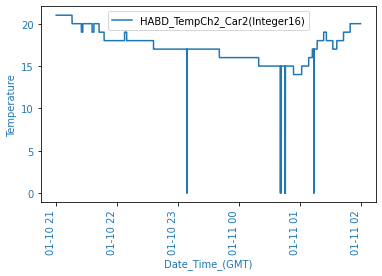

In [9]:
new_column = 'HABD_TempCh2_Car2(Integer16)'
start_date = '2021-01-10 21:00:00'
end_date = '2021-01-11 02:00:00'
minutes = range(0, 300)

df = all_data[(all_data['Date_Time_(GMT)'] > start_date) & (all_data['Date_Time_(GMT)'] <= end_date)].copy().set_index('Date_Time_(GMT)')
df.plot(y=new_column, kind='line')
plt.xticks(color='C0', rotation='vertical')
plt.xlabel('Date_Time_(GMT)', color='C0', size=10)
plt.yticks(color='C0')
plt.ylabel('Temperature', color='C0', size=10)
plt.show()

In [60]:
# df = pd.DataFrame(coach_plot, columns=[coach_plot['Date_Time_(GMT)'], coach_plot[new_column]])
# df.plot(x='Date_Time_(GMT)', y=new_column, kind='line' )
# plt.show()

#### Create a date mask for the time frame

### Filter out the low temperatures

In [11]:
HABD_cols = [col for col in all_data]

In [9]:
minutes = end_date - start_date

TypeError: unsupported operand type(s) for -: 'str' and 'str'